<a href="https://colab.research.google.com/github/Archandra12/Term4-Projects/blob/main/Groceries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**

1. [Introduction](#Section1)<br><br>
2. [Problem Statement](#Section2)<br><br>
3. [Dataset](#Section3)<br><br>
4. [Load Libraries](#Section4)<br><br>
5. [Pre-processing](#Section5)<br><br>
6. [Model evaluation](#Section6)

#Introduction
  Study of data to see the behavior of entities producing data and then finding the inferences has been a great achivement of Statisticians all this while. with invent of BIG Data, Machine learning Computer is now capable of performing statistical analysis on the whole lot of data. We can even avoid the theory of taking sampling the data and deciding inferences. 

##Problem Statement:
  Our nearby grocery store contacted a Data scientist and requested to do study of their sold inventory and suggest what changes should it make in the shop in terms of placing products so that customers shop convinently.

  Data scientist studied the data and see the customers behavior on purchased goods. Data scientist used 'Apriori' algorithm of Machine learning to see following:
  -  Most purchased items (individually)
  -  Most purchased combinations of items (two or more)
  - Pattern of which item customer essentially picks if he/she purchases s particular items

  Once the study concluded Data scientist gave recommendations regarding placing items in close vicinity of each other. Gave idea of introducing promotions on products to attract customers. Ideas from Data scientist worked and customer turnout started to increase.


In this notebook. We will see the steps Datascientist performs to achieve all this.

# Dataset
  To study the customer buying behavior we have taken past few months orders and see the items purchased on each transaction. Dataset consisted items purchased on the order and that means in some order there could be only a single item bought and in some orders there could be a big number. As we follow the process for study we will see what all we have in data. 

  **So, let's begin!**

##Load Libraries

In [1]:
#libraries to load and process data
import numpy as np
import pandas as pd

#Libraries to plot the data to see patterns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
#Libraries for appriori algorithm to pre-process data and apply ML Algorithm
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#Library to plot a network diagram to show association of products
import networkx as nx

##Load Data

 Using Pandas DataFrame to load the csv datafile

In [3]:
file_path = "/content/sample_data/data.csv"
df = pd.read_csv(file_path, sep=",")
df

,item0,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,flour,coffee,red/blush wine,salty snack,chocolate,hygiene articles,napkins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(9835, 32)

We can see our data file has 9835 records. Maximum number of items purchased in a transaction are 32. Therefore our dataframe is of shape (9835,32)

Apriori algorithm takes the list of items that were bought together as input. Hence, we need to get each row 
as list (except 'NAN' in the columns).
Create a list of trasactions


In [10]:
transactions = []

# Add all the items from each row in one list( Neglect the 1st columns where all the items are in number (0-9))
for i in range(0, 9835):
    transactions.append([str(df.values[i,u])  for u in range(0, 32) if pd.notnull(df.values[i,u])])

In [11]:
len(transactions)

9835

###Creating a matrix which will have columns for all the items and all rows in the dataset. Each row will have True for item purchased and False otherwise

In [16]:
#Using TransactionEncoder
#creating an object of class
te = TransactionEncoder()
#fit and transform transaction list
te_ary = te.fit(transactions).transform(transactions)
#create a dataframe from the transformed list
df_new = pd.DataFrame(te_ary, columns=te.columns_)
df_new

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,...,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False,False,False,Fa

###Define a function to apply on Dataframe to convert True = 1 and False = 0. This will help to take count.

In [17]:
def apply_num(x):
  if x==True:
    return 1
  else:
    return 0  
df_num = df_new.applymap(apply_num)

In [18]:
df_num.sum()

Instant food products      79
UHT-milk                  329
abrasive cleaner           35
artif. sweetener           32
baby cosmetics              6
                         ... 
white bread               414
white wine                187
whole milk               2513
yogurt                   1372
zwieback                   68
Length: 169, dtype: int64

In [21]:
df_item_count = pd.DataFrame(df_num.sum()).reset_index()
df_item_count.columns = ['item', 'count']

In [81]:
df_item_count

,item,count
0,Instant food products,79
1,UHT-milk,329
2,abrasive cleaner,35
3,artif. sweetener,32
4,baby cosmetics,6
...,...,...
164,white bread,414
165,white wine,187
166,whole milk,2513
167,yogurt,1372


###See the graph to know highest sold items

In [24]:
fig  =  plt.figure(figsize = (15,8))
fig = px.bar(df_item_count,
             y="count",
             x="item",
             color="item", )
fig.show()

<Figure size 1080x576 with 0 Axes>

Observations: From the graph above we can see that Whole milk is most frequently sold item along with Other vegetables, Rolls/Buns and Soda.

### Run the appriori Algorithm on data to see the itemsets with frequent occurances with over a minimum support

In [35]:
frequent_itemsets = apriori(df_new, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets
#apriori(df_new, min_support=0.01, use_colnames=True)

,support,itemsets,length
0,0.033452,(UHT-milk),1
1,0.017692,(baking powder),1
2,0.052466,(beef),1
3,0.033249,(berries),1
4,0.026029,(beverages),1
...,...,...,...
328,0.011998,"(root vegetables, whole milk, tropical fruit)",3
329,0.014540,"(root vegetables, yogurt, whole milk)",3
330,0.010473,"(soda, yogurt, whole milk)",3
331,0.015150,"(yogurt, whole milk, tropical fruit)",3


In [36]:
frequent_itemsets[frequent_itemsets['length']>1]

,support,itemsets,length
88,0.019725,"(beef, other vegetables)",2
89,0.013625,"(rolls/buns, beef)",2
90,0.017387,"(root vegetables, beef)",2
91,0.021251,"(beef, whole milk)",2
92,0.011693,"(beef, yogurt)",2
...,...,...,...
328,0.011998,"(root vegetables, whole milk, tropical fruit)",3
329,0.014540,"(root vegetables, yogurt, whole milk)",3
330,0.010473,"(soda, yogurt, whole milk)",3
331,0.015150,"(yogurt, whole milk, tropical fruit)",3


### Let's check the association rules

In [38]:
rules  =  association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.0)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
1,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
2,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
3,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
5,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
6,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
7,(whole milk),(beef),0.255516,0.052466,0.021251,0.083168,1.585180,0.007845,1.033487
8,(beef),(yogurt),0.052466,0.139502,0.011693,0.222868,1.597601,0.004374,1.107275
9,(yogurt),(beef),0.139502,0.052466,0.011693,0.083819,1.597601,0.004374,1.034222


In [13]:
#!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5977 sha256=bb7ebc67d8ea3f64e3dd9f5b26b1bc4839ddfdca3a383ffe42e3ddfedb5af187
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


###Sorting the rules in descending order of confidence
- Confidence is a measure of conditional probability of Consequent product being picked when antecedent products are picked.

In [42]:
rules.sort_values('confidence', ascending  =  False, inplace  =  True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
418,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
492,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
436,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
413,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
569,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
574,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
443,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694


To explain how to draw inference explore the first rule:
-  we can see that (root vegetables, citrus fruit) and	(other vegetables) are commonly bought together. This makes sense since people who purchase (root vegetables, citrus fruit)	 would like to have (other vegetables) with it.

- The support value for the this rule is 0.010371. This number is calculated by dividing the number of transactions containing (root vegetables, citrus fruit) divided by total number of transactions.
- The confidence level for the rule is 0.586207 which shows that out of all the transactions that contain (root vegetables, citrus fruit), 58.62% of the transactions also contain (other vegetables).
- Finally, the lift of 3.029608 tells us that (other vegetables) is 3.029608 times more likely to be bought by the customers who buy (root vegetables, citrus fruit) compared to the default likelihood of the sale of (other vegetables).


###For observing the rules where confidence is greater than or equal to 0.55

In [40]:
rules = rules[rules['confidence']>= 0.55]
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
418,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
492,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
436,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
413,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
569,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553


How do we interpret these rules?

58.62% of the customers who bought (root vegetables, citrus fruit) also bought (other vegetables).

58.45% of the customers who bought (root vegetables, tropical fruit) also bought (other vegetables).

58.23% of the customers who bought (curd, yogurt) also bought (whole milk).

And so on.

###Visualizing the association

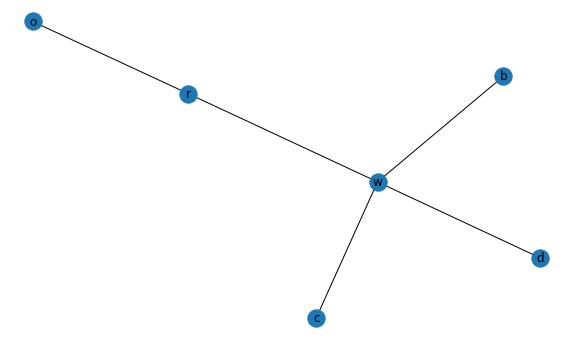

In [45]:

rules.antecedents  =  rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents  =  rules.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)

6. **Conclusion**

- (root vegetables, citrus fruit) is the bestseller of this Grocery shop and it shows association with (other vegetables)
- Whole milk has been bought along with curd, yogurt, butter, and tropical fruits
- Example	Strategy

	- Promotional discount can be given to customers to entice them to buy vegetables and whole milk
	- Placing these items close to whole milk or keeping whole milk near checkout counter can be a good strategy to attract customers in buying these.

Thus, we have a fundamental thought of how to build a product recommendation system for retail stores.